In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st
from functools import reduce


In [2]:
final_demo = pd.read_csv('df_final_demo.txt', delimiter=',', on_bad_lines='skip')
print(final_demo.columns)

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')


In [3]:
final_web_data_1 = pd.read_csv('df_final_web_data_pt_1.txt', delimiter=',', on_bad_lines='skip')
print(final_web_data_1.columns)
# final_web_data_1.head()

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')


In [4]:
final_web_data_2 = pd.read_csv('df_final_web_data_pt_2.txt', delimiter=',', on_bad_lines='skip')
print(final_web_data_2.columns)
# final_web_data_2.head()

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')


In [5]:
final_clients = pd.read_csv('df_final_experiment_clients.txt', delimiter=',', on_bad_lines='skip')
print(final_clients.columns)
final_clients['Variation'].isnull().sum()
# len(final_demo) - len(final_clients)

Index(['client_id', 'Variation'], dtype='object')


20109

In [6]:
# Merge and clean data from final_web_data_1 and final_web_data_2
# Merging the DataFrames
merged_data = pd.concat([final_web_data_1, final_web_data_2])

# Check for duplicate rows
duplicate_rows = merged_data[merged_data.duplicated()]

# Output the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


# Remove duplicate rows
cleaned_data = merged_data.drop_duplicates()

# Verify the removal by checking the number of rows before and after
print(f"Number of rows before removing duplicates: {merged_data.shape[0]}")
print(f"Number of rows after removing duplicates: {cleaned_data.shape[0]}")
print(f"Number of duplicate rows after: {cleaned_data[cleaned_data.duplicated()].shape[0]}")
cleaned_data


Number of duplicate rows: 10764
Number of rows before removing duplicates: 755405
Number of rows after removing duplicates: 744641
Number of duplicate rows after: 0


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [7]:
# Create a function that will take 2 datasets client_variation and client_process, clean data and check for null values for client_id for both dataframes
# and Variation column (only for dataframe1). Return the cleaned dataframes as 2 separate dataframes.

def clean_data(df1, df2):
    # df1 -> client_variation df2 -> client_process
    # Check for null values in client_id column of client_variation
    print(f"null values in client_id column of final_clients: {df1['client_id'].isnull().sum()}")
    # Check for null values in Variation column of client_variation
    print(f"null values in Variant column of final_clients: {df1['Variation'].isnull().sum()}")
    
    # Rename Variation column to variation in client_variation
    df1 = df1.rename(columns={'Variation': 'variation'})
    client_variation = df1
    # Print out null values of client_id column in client_variation
    print(f"null values in client_id column of final_web_data: {df2['client_id'].isnull().sum()}")
    # Drop null values from df2
    client_process = df2.dropna()
    print("null value after cleaning the data final_clients: ", client_variation.isnull().sum().sum())
    print("null value after cleaning the data final_web_data: ", client_process.isnull().sum().sum())
    return client_variation, client_process

# Clean the data
client_variation, client_process = clean_data(final_clients, cleaned_data)

# Print the shapes of the cleaned dataframes
print("client_variation shape:", client_variation.shape)
print("client_process shape:", client_process.shape)
client_variation,client_process

null values in client_id column of final_clients: 0
null values in Variant column of final_clients: 20109
null values in client_id column of final_web_data: 0
null value after cleaning the data final_clients:  20109
null value after cleaning the data final_web_data:  0
client_variation shape: (70609, 2)
client_process shape: (744641, 5)


(       client_id variation
 0        9988021      Test
 1        8320017      Test
 2        4033851   Control
 3        1982004      Test
 4        9294070   Control
 ...          ...       ...
 70604    2443347       NaN
 70605    8788427       NaN
 70606     266828       NaN
 70607    1266421       NaN
 70608    9895983       NaN
 
 [70609 rows x 2 columns],
         client_id             visitor_id                      visit_id  \
 0         9988021   580560515_7732621733  781255054_21935453173_531117   
 1         9988021   580560515_7732621733  781255054_21935453173_531117   
 2         9988021   580560515_7732621733  781255054_21935453173_531117   
 3         9988021   580560515_7732621733  781255054_21935453173_531117   
 4         9988021   580560515_7732621733  781255054_21935453173_531117   
 ...           ...                    ...                           ...   
 412259    9668240   388766751_9038881013   922267647_3096648104_968866   
 412260    9668240   388766751_9038

In [8]:
# Replace the unknown values of the gendr column in final_demo with the correct values
print(final_demo['gendr'].value_counts())
final_demo['gendr'].replace('X', 'U', inplace=True)
print(final_demo['gendr'].value_counts())


gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64
gendr
U    24125
M    23724
F    22746
Name: count, dtype: int64


/var/folders/cs/y9j221r92lb_hk6mpd7ppm0c0000gn/T/ipykernel_74294/593816891.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_demo['gendr'].replace('X', 'U', inplace=True)


In [9]:
# Create a function to print overview of a dictionary with 3 pairs of name of dfs as keys and their associating dataframes
# as values. The function should print the name of the dataframe, the shape of the dataframe, the .info() of the dataframe and the number of duplicate rows in the dataframe.
def print_overview(df_dict):
    for name, df in df_dict.items():
        print(f"DataFrame: {name}")
        print(f"Shape: {df.shape}")
        print("Info:")
        print(df.info())
        duplicate_rows = df[df.duplicated()]
        print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
        print("\n")
df_dict = {"Client Info": final_demo, "Client Process": client_process, "Clients Test Status": client_variation}
print_overview(df_dict)

DataFrame: Client Info
Shape: (70609, 9)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
None
Number of duplicate rows: 0


DataFrame: Client Process
Shape: (744641, 5)
Info:
<class 'pandas.core.frame.DataFrame'>
Index: 744641 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        -------------

In [10]:
final_demo.info()
# Explaining the columns meaning 
# client_id: Unique identifier of the client
# clnt_tenure_yr: Number of years the client has been with the company
# clnt_tenure_mnth: Number of months the client has been with the company
# clnt_age: Age of the client
# gendr: Client Gender
# num_accts: # of accounts the client has
# bal: total balance of the client
# calls_6_mnth: # of calls made by the client in the last 6 months
# logons_6_mnth: # of logons made by the client in the last 6 months


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [11]:
client_process['client_id'].value_counts()
client_process.head()
# Explaining the columns meaning
# client_id: Unique identifier of the client
# visitor_id: Unique identifier of the visitor
# visit_id: Unique identifier of the visit
# process_step: The step in the process
# date_time: Date and time of the process

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [12]:
client_variation.value_counts()
# Explaining the columns meaning
# client_id: Unique identifier of the client
# variation: The nature of the client inside the experiment

client_id  variation
555        Test         1
6670730    Control      1
6670895    Test         1
6671189    Test         1
6671416    Control      1
                       ..
3357578    Control      1
3357999    Control      1
3358285    Test         1
3358700    Test         1
9999832    Test         1
Name: count, Length: 50500, dtype: int64

In [53]:
client_process.groupby('visit_id')['date_time'].head()

0         2017-04-17 15:27:07
1         2017-04-17 15:26:51
2         2017-04-17 15:19:22
3         2017-04-17 15:19:13
4         2017-04-17 15:18:04
                 ...         
412244    2017-05-24 19:05:14
412245    2017-05-24 19:05:07
412246    2017-05-24 19:04:43
412247    2017-05-24 19:04:03
412263    2017-06-03 12:17:09
Name: date_time, Length: 609136, dtype: object

Answer the following questions about demographics:

Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?
Next, carry out a client behaviour analysis to answer any additional relevant questions you think are important.




Completion Rate: The proportion of users who reach the final ‘confirm’ step.
Time Spent on Each Step: The average duration users spend on each step.
Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.


In [13]:
# 2 KPIs that can be calculated from the data: Completion Rate and Average Duration
def calculate_completion_rate(client_process):
    # Calculate the value counts for 'process_step'
    client_process['process_step'].value_counts()
    
    # Completion Rate
    clients_confirmed = client_process[client_process['process_step'] == 'confirm']
    # print("a", clients_confirmed.duplicated().sum())
    return clients_confirmed

# Function to calculate the average duration for each process_step by client_id from a given dataframe
# Check for all unique clietn_id in the dataframe
# For each client_id, calculate the duration for each process_step



def calculate_average_duration(client_process):
    # Ensure date_time is in datetime format
    client_process['date_time'] = pd.to_datetime(client_process['date_time'])
    
    # Sort the data by visit_id and date_time
    client_process = client_process.sort_values(['visit_id', 'date_time'])
    
    # Calculate the duration for each step
    client_process['duration'] = client_process.groupby('visit_id')['date_time'].diff()
    
    # Convert duration to seconds
    client_process['duration'] = client_process['duration'].dt.total_seconds()
    
    # Calculate the average duration for each process_step
    average_duration = client_process.groupby('process_step')['duration'].mean().reset_index()
    average_duration = average_duration.sort_values('duration', ascending=False)
    return average_duration

clients_confirmed = calculate_completion_rate(client_process)
# average_duration = calculate_average_duration(client_process)
# average_duration
clients_confirmed

,client_id,visitor_id,visit_id,process_step,date_time
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03
14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01
15,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52
24,1982004,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17 12:02:42
...,...,...,...,...,...
412221,1462269,756274405_34153014475,903240226_7790404978_158729,confirm,2017-06-03 11:49:32
412227,9563467,358754208_29929976792,898272434_72817818195_285148,confirm,2017-06-04 10:21:23
412234,2443347,818414719_69544570654,148166449_67114410166_524360,confirm,2017-05-30 19:18:18
412235,9895983,473024645_56027518531,498981662_93503779869_272484,confirm,2017-06-15 19:55:09


In [48]:
# Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error.
#  You should consider moving from a later step to an earlier one as an error
# Calculate the total amount goes back to a previous step in each process_step
def calculate_error_rate_per_step(client_process):
    # Add previous_step column
    client_process['previous_step'] = client_process.groupby('visit_id')['process_step'].shift(1)
    
    # Fill NaN values in previous_step with 'start'
    client_process['previous_step'] = client_process['previous_step'].fillna('start')
    
    # Determine if the client went back in the process
    client_process['went_back'] = (client_process['process_step'] != 'start') & (client_process['process_step'] != 'confirm') & (client_process['process_step'] != client_process['previous_step'])
    
    # Calculate error rate per process_step
    error_rate_per_step = client_process.groupby('process_step')['went_back'].sum().reset_index()
    
    # Renaming columns for clarity
    error_rate_per_step.columns = ['process_step', 'went_back']
    return error_rate_per_step
# Calculate the number of times a user goes back to a previous step
def calculate_error_rate(client_process):
    # Add previous_step column
    client_process['previous_step'] = client_process.groupby('visit_id')['process_step'].shift(1)
    
    # Fill NaN values in previous_step with 'start'
    client_process['previous_step'] = client_process['previous_step'].fillna('start')
    
    # Determine if the client went back in the process
    client_process['went_back'] = (client_process['process_step'] != 'start') & (client_process['process_step'] != 'confirm') & (client_process['process_step'] != client_process['previous_step'])
     # Calculate error rate per client
    error_rate_per_client = client_process.groupby('client_id')['went_back'].sum().reset_index()

    # Renaming columns for clarity
    error_rate_per_client.columns = ['client_id', 'went_back']
    # Plot of the number of went_back based on their process_step
    # sns.countplot(x='process_step', hue='went_back', data=client_process)
    plt.show()
    return error_rate_per_client
error_rate_per_client = calculate_error_rate(client_process)
error_rate_per_step = calculate_error_rate_per_step(client_process)
error_rate_per_step

,process_step,went_back
0,confirm,0
1,start,0
2,step_1,155532
3,step_2,129319
4,step_3,107967


In [15]:
# Easy Success rate: The percentage of clients who successfully complete the process without encountering an error
def calculate_easy_success_rate(client_process):
    # Calculate the number of clients who did not encounter an error
    clients_confirmed2 = calculate_completion_rate(client_process)
    client_error = calculate_error_rate(client_process)
    clients_confirmed2 = clients_confirmed2.reset_index(drop=True)
    client_error = client_error.reset_index(drop=True)
    client_process = client_process.reset_index(drop=True)
    # Filter clients who did not encounter an error and confirmed the process
    clients_no_error = client_process[
        (client_process['client_id'].isin(clients_confirmed2['client_id'])) & 
        (client_error['went_back'] == 0) & 
        (client_process['process_step'] == 'confirm')
    ]
    return clients_no_error

easy_success_rate = calculate_easy_success_rate(client_process)
easy_success_rate

,client_id,visitor_id,visit_id,process_step,date_time,previous_step,went_back
42,6651403,387438258_49845138949,754106292_61370647593_160929,confirm,2017-04-04 17:38:39,start,False
79,5407849,419808108_25250476789,370129048_76114952835_698370,confirm,2017-04-05 11:02:44,start,False
177,2965703,44497549_93330509950,78896439_82354112520_624661,confirm,2017-04-06 12:24:05,start,False
392,1532932,364584852_73429595908,737364936_28461699590_320327,confirm,2017-04-04 13:34:46,start,False
487,768936,719530284_21567955069,530225320_60503692575_906337,confirm,2017-03-30 17:33:32,start,False
...,...,...,...,...,...,...,...
119766,1739648,371139419_92969252311,320282903_62334954139_148333,confirm,2017-04-27 21:45:47,start,False
119894,4164474,867462729_73701056500,200181912_10517121248_341595,confirm,2017-03-29 11:24:03,start,False
119993,4541475,715757739_55592415862,660790385_64211301673_317799,confirm,2017-04-10 18:14:27,step_1,False
120030,880925,292756161_71134870795,712526471_22797822419_813321,confirm,2017-03-22 13:34:21,start,False


In [16]:
# seperate the data into 2 groups based on the variation column from the client_variation dataframe and final_demo dataframe 
# based on same client_id and add the variation column to the final_demo dataframe
# Into 2 dfs: control_group and test_group
total_group = final_demo.merge(client_variation, on='client_id', how='inner')
control_group = total_group[total_group['variation'] == 'Control']
test_group = total_group[total_group['variation'] == 'Test']
unknown_group = total_group[total_group['variation'].isnull()]
# Seperate client_process into 2 dataset based on the client_id from the control_group and test_group
# Into 2 dfs: control_process and test_process
# Also add the variation column to the control_process and test_process
control_process = client_process.merge(control_group['client_id'], on='client_id', how='inner')
control_process['variation'] = 'Control'
test_process = client_process.merge(test_group['client_id'], on='client_id', how='inner')
test_process['variation'] = 'Test'
unknown_process = client_process.merge(unknown_group['client_id'], on='client_id', how='inner')
unknown_process['variation'] = 'Unknown'

In [17]:
control_process, test_process, unknown_process

(        client_id             visitor_id                      visit_id  \
 0         4033851  762728880_76361333336  949661017_22392791362_127391   
 1         4033851  762728880_76361333336  949661017_22392791362_127391   
 2         4033851  762728880_76361333336  949661017_22392791362_127391   
 3         4033851  762728880_76361333336  949661017_22392791362_127391   
 4         4033851  762728880_76361333336  949661017_22392791362_127391   
 ...           ...                    ...                           ...   
 140531     433098    5505424_50616523266  773565250_67577573147_389841   
 140532    2908510  814969699_90652851448   562606085_36368381773_92090   
 140533    2908510  814969699_90652851448   562606085_36368381773_92090   
 140534    2908510  814969699_90652851448   562606085_36368381773_92090   
 140535    2908510  814969699_90652851448   562606085_36368381773_92090   
 
        process_step            date_time previous_step  went_back variation  
 0           confir

In [18]:
KPI_dict = {
    "Completion Rate": "completion_rate",
    "Error Rate": "error_rate",
    "Easy Success Rate": "easy_success_rate"
}

# Initialize result_df as a global variable
result_df = pd.DataFrame(columns=['variation', 'completion_rate', 'error_rate', 'easy_success_rate'])

def calculate_kpis(client_process, variation):
    total_customers_in_group = client_process['client_id'].nunique()
    
    # Calculate Completion Rate
    completion_df = calculate_completion_rate(client_process)
    total_confirms = len(completion_df)
    completion_rate = total_confirms / total_customers_in_group
    
    # Calculate Went Back Amount? Error Rate
    error_df = calculate_error_rate(client_process)
    error_rate = error_df['went_back'].mean()
    
    # Calculate Easy Success Rate
    easy_success_df = calculate_easy_success_rate(client_process)
    clients_no_error = easy_success_df[easy_success_df['went_back'] == 0]
    easy_success_rate = len(clients_no_error) / total_customers_in_group
    
    # Append the results to result_df
    new_row = {
        'variation': variation,
        'completion_rate': completion_rate,
        'error_rate': error_rate,
        'easy_success_rate': easy_success_rate
    }
    
    global result_df
    new_row_df = pd.DataFrame([new_row])
    result_df = pd.concat([result_df, new_row_df], ignore_index=True)

# Example usage:
# Assuming control_process and test_process are your DataFrames for control and test groups

# Calculate KPIs for control group
calculate_kpis(control_process, 'Control')

# Calculate KPIs for test group
calculate_kpis(test_process, 'Test')

calculate_kpis(unknown_process, 'Unknown')

result_df

/var/folders/cs/y9j221r92lb_hk6mpd7ppm0c0000gn/T/ipykernel_74294/606595074.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row_df], ignore_index=True)


,variation,completion_rate,error_rate,easy_success_rate
0,Control,0.736699,3.189912,0.016106
1,Test,0.949273,3.424244,0.014202
2,Unknown,0.854592,3.328510,0.015317


In [19]:
# Seperate df client_process into 2 dataset based on the client_id from the control_group and test_group
control_group_process = client_process.merge(control_group['client_id'], on='client_id', how='inner')
test_group_process = client_process.merge(test_group['client_id'], on='client_id', how='inner')
unknown_group_process = client_process.merge(unknown_group['client_id'], on='client_id', how='inner')
control_group_process.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'previous_step', 'went_back'],
      dtype='object')

In [20]:
def calculate_average_duration(client_process):
    # Ensure date_time is in datetime format
    client_process['date_time'] = pd.to_datetime(client_process['date_time'])
    
    # Sort the data by visit_id and date_time
    client_process = client_process.sort_values(['visit_id', 'date_time'])
    
    # Calculate the duration for each step
    client_process['duration'] = client_process.groupby('visit_id')['date_time'].diff()
    
    # Convert duration to seconds
    client_process['duration'] = client_process['duration'].dt.total_seconds()
    
    # Calculate the average duration for each process_step
    average_duration = client_process.groupby('process_step')['duration'].mean().reset_index()
    
    return average_duration
# Function to calculate duration of each steps for each id: using client_process df and return as a new df which include each client_id, their time on each step
def calculate_duration_per_step(client_process):
    # Ensure date_time is in datetime format
    client_process['date_time'] = pd.to_datetime(client_process['date_time'])
    
    # Sort the data by visit_id and date_time
    client_process = client_process.sort_values(['visit_id', 'date_time'])
    
    # Calculate the duration for each step
    client_process['duration'] = client_process.groupby('visit_id')['date_time'].diff()
    
    # Convert duration to seconds
    client_process['duration'] = client_process['duration'].dt.total_seconds()
    
    # Calculate the average duration for each process_step
    average_duration_per_steps = client_process.groupby(['client_id', 'process_step'])['duration'].mean().reset_index()
    
    return average_duration_per_steps
# Example usage:
# Assuming control_group_process and test_group_process are your DataFrames
average_duration_control = calculate_average_duration(control_group_process)
average_duration_test = calculate_average_duration(test_group_process)
average_duration_unknown = calculate_average_duration(unknown_group_process)
average_duration_control_per_step = calculate_duration_per_step(control_group_process)
# Merge the two DataFrames
average_total = pd.merge(average_duration_control, average_duration_test, on='process_step', suffixes=('_control', '_test'))
average_total = pd.merge(average_total, average_duration_unknown, on='process_step', suffixes=('_unknown', '_unknown'))
average_total = average_total.rename(columns={'duration': 'duration_unknown'})
# Sort by the custom order
process_step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
average_total['process_step'] = pd.Categorical(average_total['process_step'], categories=process_step_order, ordered=True)
average_total = average_total.sort_values('process_step')

average_duration_control_per_step

,client_id,process_step,duration
0,1028,start,NaN
1,1028,step_1,50.400000
2,1028,step_2,5.500000
3,1028,step_3,275.000000
4,1104,start,NaN
...,...,...,...
95050,9998346,start,NaN
95051,9998346,step_1,88.500000
95052,9998346,step_2,30.750000
95053,9998346,step_3,149.333333


In [21]:
# Calculate the mean of duration_control, duration_test, and duration_unknown
mean_duration_control = average_total['duration_control'].mean()
mean_duration_test = average_total['duration_test'].mean()
mean_duration_unknown = average_total['duration_unknown'].mean()

# Calculate the count of unique clients for each group
control_count = control_group_process['client_id'].nunique()
test_count = test_group_process['client_id'].nunique()
unknown_count = unknown_group_process['client_id'].nunique()

# Calculate the duration of each steps of each client for each group
control_duration_per_step = calculate_duration_per_step(control_group_process)
test_duration_per_step = calculate_duration_per_step(test_group_process)
unknown_duration_per_step = calculate_duration_per_step(unknown_group_process)
# Add the duration of each steps of each client to a new DataFrame with the columns: client_id, process_step, duration, variation (for the corresponding group)
control_duration_per_step['variation'] = 'Control'
test_duration_per_step['variation'] = 'Test'
unknown_duration_per_step['variation'] = 'Unknown'
# Merge the DataFrames
duration_total = pd.concat([control_duration_per_step, test_duration_per_step, unknown_duration_per_step])

# Add these values to the avg_duration column in result_df for the corresponding variations
result_df.loc[result_df['variation'] == 'Control', 'avg_duration_step'] = mean_duration_control
result_df.loc[result_df['variation'] == 'Test', 'avg_duration_step'] = mean_duration_test
result_df.loc[result_df['variation'] == 'Unknown', 'avg_duration_step'] = mean_duration_unknown

# Add the counts to result_df for the corresponding variations and convert to integers
result_df.loc[result_df['variation'] == 'Control', 'count'] = int(control_count)
result_df.loc[result_df['variation'] == 'Test', 'count'] = int(test_count)
result_df.loc[result_df['variation'] == 'Unknown', 'count'] = int(unknown_count)

# Display the updated result_df
# result_df
duration_total

,client_id,process_step,duration,variation
0,1028,start,NaN,Control
1,1028,step_1,50.4,Control
2,1028,step_2,5.5,Control
3,1028,step_3,275.0,Control
4,1104,start,NaN,Control
...,...,...,...,...
82966,9999839,confirm,35.0,Unknown
82967,9999839,start,157.0,Unknown
82968,9999839,step_1,3.0,Unknown
82969,9999839,step_2,15.0,Unknown


In [22]:
# Client information along with variation column for each client

# Merge the dataframes
client_info = final_demo.merge(client_variation[['client_id', 'variation']], on='client_id', how='left')

# Fill null values in the 'variation' column with 'Unknown'
client_info['variation'].fillna('Unknown', inplace=True)

# Convert the 'variation' column to a categorical type with the specified order
client_info['variation'] = pd.Categorical(client_info['variation'], categories=['Control', 'Test', 'Unknown'], ordered=True)

# Sort the DataFrame by the 'variation' column
client_info.sort_values('variation', inplace=True)

# Reset the index of the sorted DataFrame
client_info.reset_index(drop=True, inplace=True)
# Add a age_group columns by using clnt_age column into age groups 0-20, 21-40, 41-60, 61-80, 81-100
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
client_info['age_group'] = pd.cut(client_info['clnt_age'], bins=bins, labels=labels, right=False)
# Display the first few rows of the resulting dataframe
client_info.head()

/var/folders/cs/y9j221r92lb_hk6mpd7ppm0c0000gn/T/ipykernel_74294/4256929913.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  client_info['variation'].fillna('Unknown', inplace=True)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,age_group
0,9159730,24.0,288.0,61.0,F,2.0,63998.86,0.0,3.0,Control,61-80
1,4376392,3.0,45.0,68.5,U,2.0,77334.29,0.0,3.0,Control,61-80
2,3431846,5.0,64.0,67.5,U,2.0,34399.88,3.0,7.0,Control,61-80
3,1318472,18.0,217.0,25.0,M,2.0,63644.06,5.0,8.0,Control,21-40
4,7414313,18.0,226.0,35.0,F,2.0,36535.22,6.0,9.0,Control,21-40


In [23]:
# Add a new columns called variation into the error_rate_per_client dataframe by looking at client_info['variation'] based on the client_id
client_error = calculate_error_rate(client_process)
client_error = client_error.merge(client_info[['client_id', 'variation']], on='client_id', how='left')
# Fill null values in the 'variation' column with 'Unknown'
client_error['variation'].fillna('Unknown', inplace=True)
client_error.reset_index(drop=True, inplace=True)
client_error.head(5)


/var/folders/cs/y9j221r92lb_hk6mpd7ppm0c0000gn/T/ipykernel_74294/3524230112.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  client_error['variation'].fillna('Unknown', inplace=True)


,client_id,went_back,variation
0,169,3,Unknown
1,336,0,Unknown
2,546,3,Unknown
3,555,3,Test
4,647,3,Test


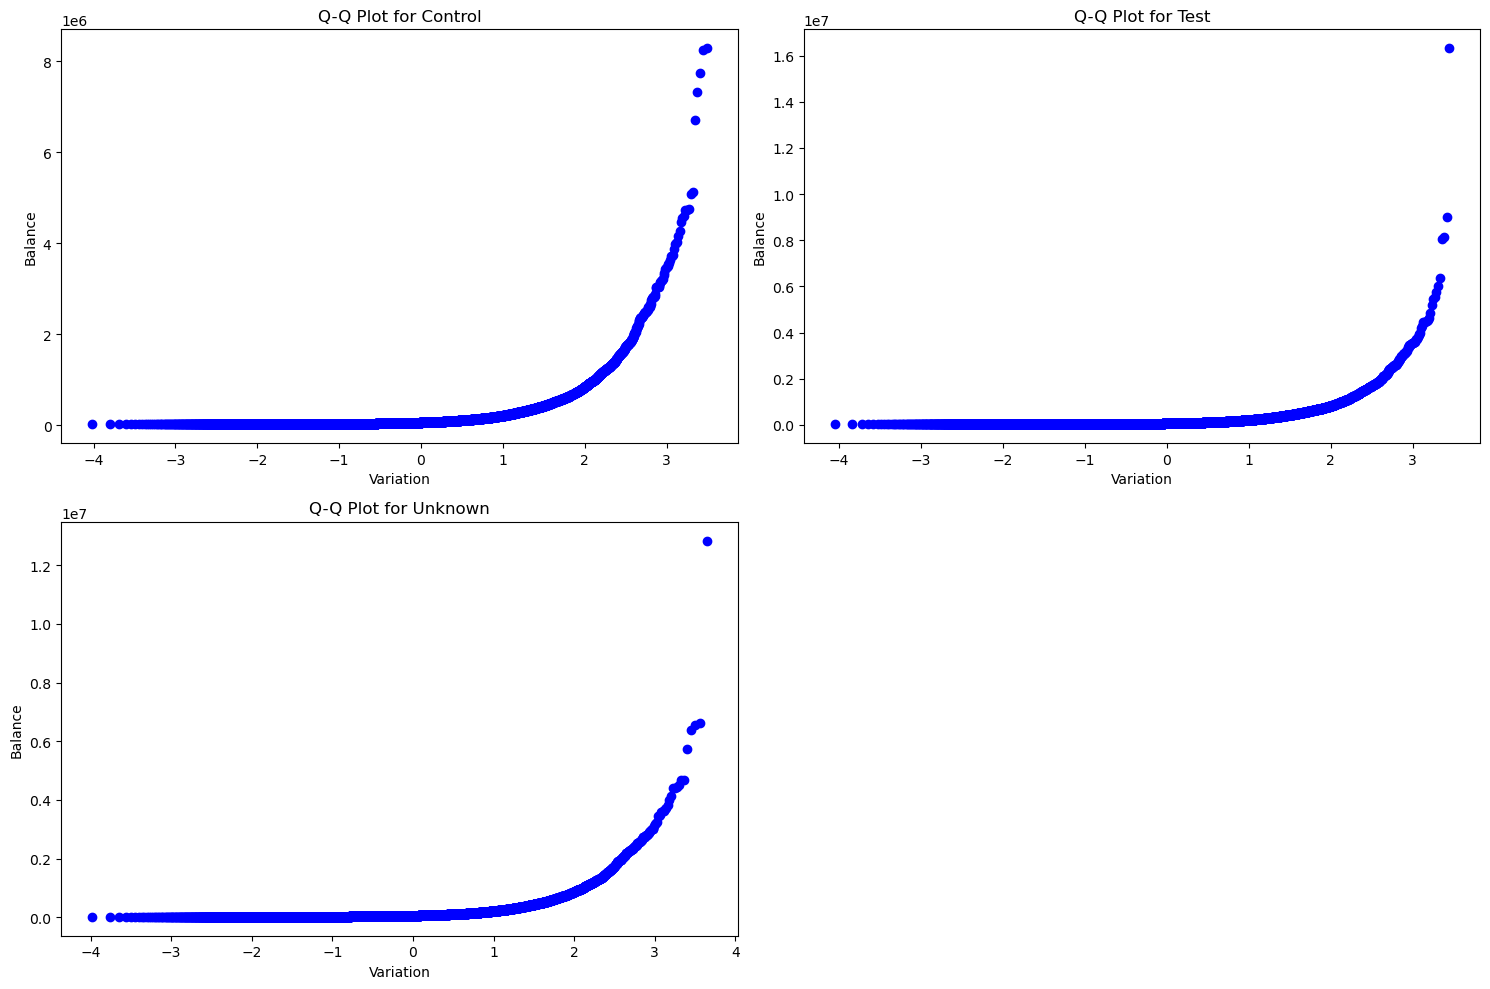

In [24]:
# Create a Q-Q plot for each variation category
variations = client_info['variation'].unique()

plt.figure(figsize=(15, 10))

for i, var in enumerate(variations, 1):
    plt.subplot(2, 2, i)
    st.probplot(client_info[client_info['variation'] == var]['bal'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {var}')
    plt.xlabel('Variation')
    plt.ylabel('Balance')

plt.tight_layout()
plt.show()

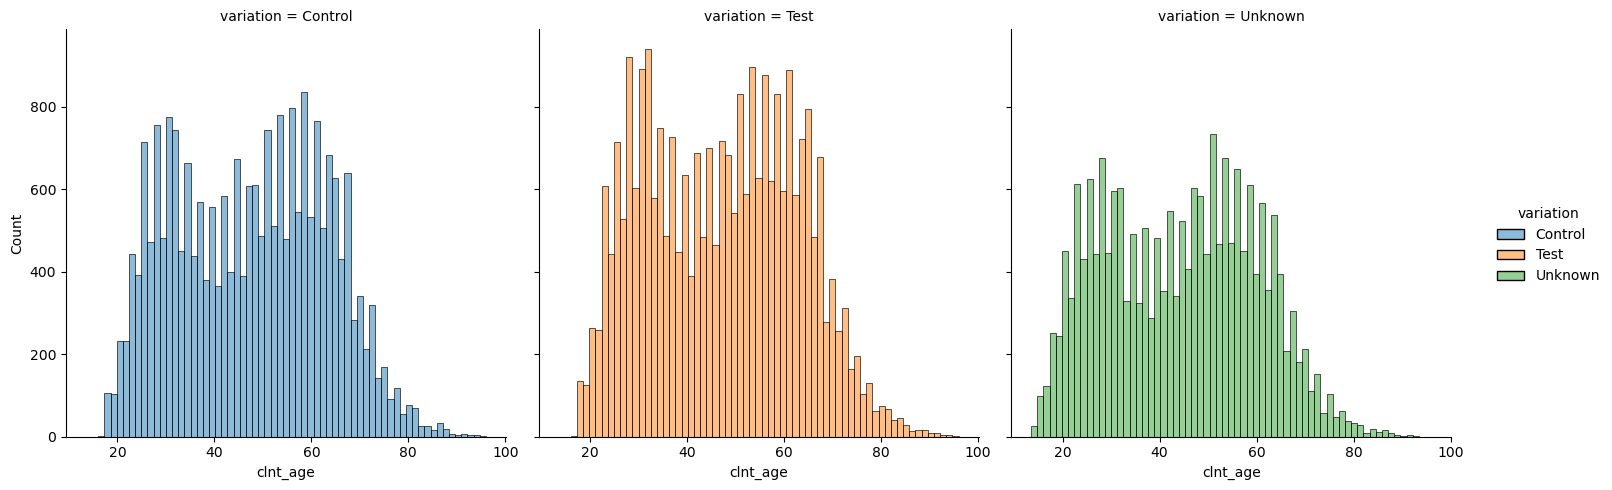

In [25]:
# Who are the primary clients using this online process?
# What is the age distribution of the clients based on their variation column ?
# Box plots for clnt_age based on the variation column (0-20s 20-40s 40-60s 60-80s 80-100s)
sns.displot(data=client_info, x="clnt_age",  hue="variation", col="variation")
plt.show()

<Axes: ylabel='count'>

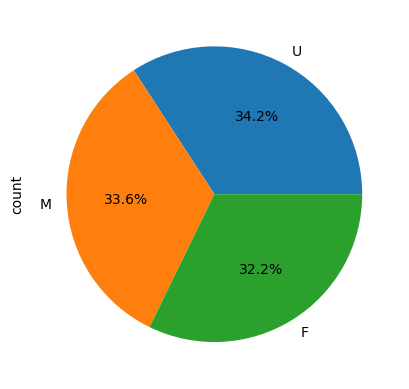

In [26]:
# Pie plot for gendr inside the final_demo dataframe
client_info['gendr'].value_counts().plot(kind='pie', autopct='%1.1f%%')

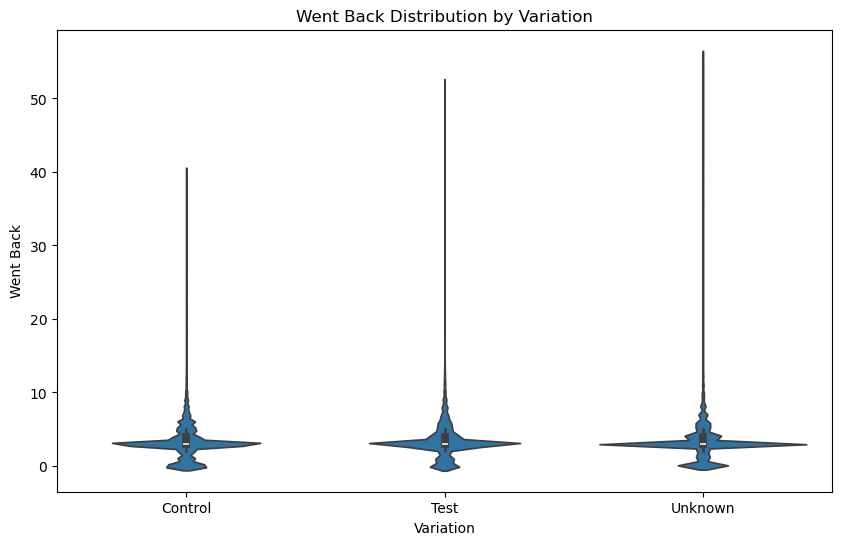

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='variation', y='went_back', data=client_error)
plt.title('Went Back Distribution by Variation')
plt.xlabel('Variation')
plt.ylabel('Went Back')
plt.show()

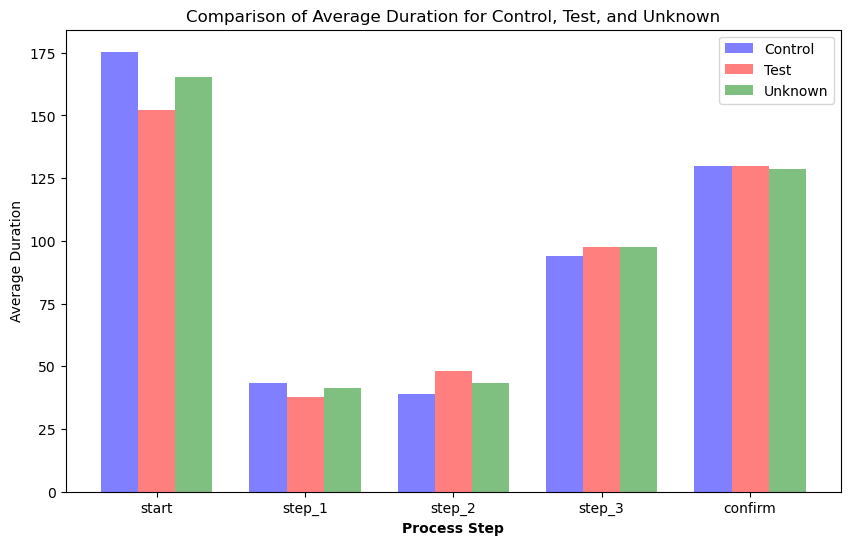

In [28]:
import numpy as np

# Assuming average_total is your DataFrame
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(average_total['process_step']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))

# Create a bar plot for 'duration_control'
plt.bar(r1, average_total['duration_control'], color='b', width=barWidth, alpha=0.5, label='Control')

# Create a bar plot for 'duration_test'
plt.bar(r2, average_total['duration_test'], color='r', width=barWidth, alpha=0.5, label='Test')

# Create a bar plot for 'duration_unknown'
plt.bar(r3, average_total['duration_unknown'], color='g', width=barWidth, alpha=0.5, label='Unknown')

# Adding xticks
plt.xlabel('Process Step', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(average_total['process_step']))], average_total['process_step'])

plt.ylabel('Average Duration')
plt.title('Comparison of Average Duration for Control, Test, and Unknown')
plt.legend()

plt.show()

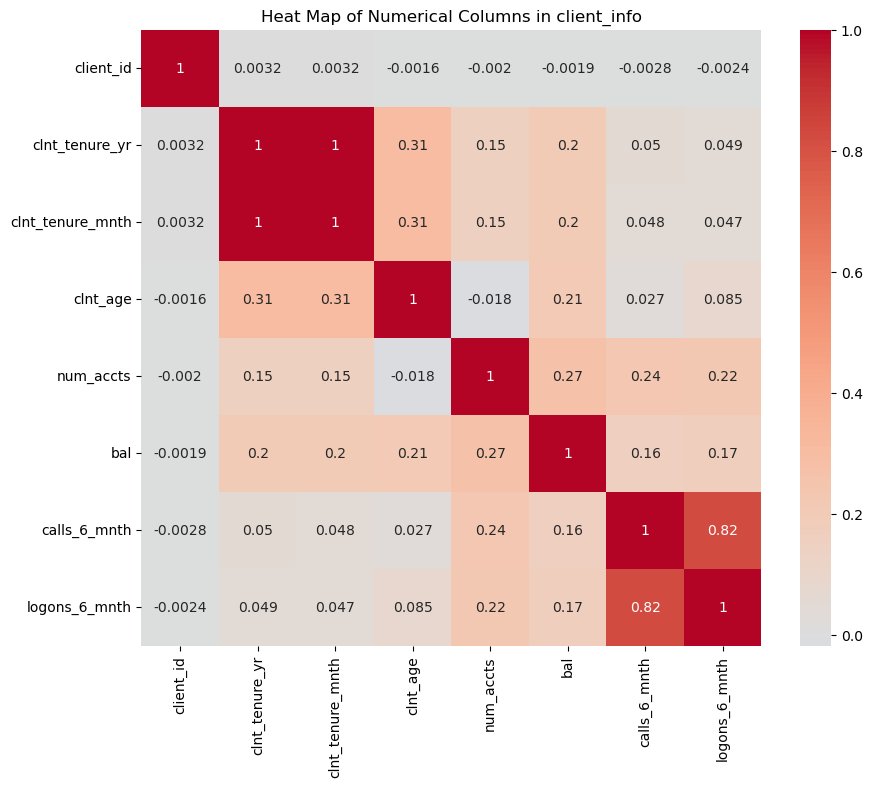

In [29]:
# Select numerical columns
numerical_columns = client_info.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = client_info[numerical_columns].corr()

# Generate the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heat Map of Numerical Columns in client_info')
plt.show()

In [30]:
result_df[result_df['variation'] == 'Control']['completion_rate']

0    0.736699
Name: completion_rate, dtype: float64

In [31]:
client_info

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,age_group
0,9159730,24.0,288.0,61.0,F,2.0,63998.86,0.0,3.0,Control,61-80
1,4376392,3.0,45.0,68.5,U,2.0,77334.29,0.0,3.0,Control,61-80
2,3431846,5.0,64.0,67.5,U,2.0,34399.88,3.0,7.0,Control,61-80
3,1318472,18.0,217.0,25.0,M,2.0,63644.06,5.0,8.0,Control,21-40
4,7414313,18.0,226.0,35.0,F,2.0,36535.22,6.0,9.0,Control,21-40
...,...,...,...,...,...,...,...,...,...,...,...
70604,337268,6.0,73.0,55.5,U,2.0,141945.38,3.0,3.0,Unknown,41-60
70605,3304293,7.0,94.0,21.0,U,3.0,75520.56,4.0,4.0,Unknown,21-40
70606,2732003,5.0,61.0,66.5,M,3.0,91958.69,7.0,7.0,Unknown,61-80
70607,5866491,4.0,59.0,20.0,U,2.0,20636.61,5.0,5.0,Unknown,21-40


In [32]:
result_df

,variation,completion_rate,error_rate,easy_success_rate,avg_duration_step,count
0,Control,0.736699,3.189912,0.016106,96.309566,23532.0
1,Test,0.949273,3.424244,0.014202,93.072499,26968.0
2,Unknown,0.854592,3.328510,0.015317,95.203697,20109.0


In [33]:
# print(client_info.columns)
# print(clients_confirmed.columns)
# Find out duplicate in clients_confirmed
# duplicate_rows = clients_confirmed[clients_confirmed.duplicated()]
# print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")\
# Add a new column called confirm into client_info if the client_id is in clients_confirmed then its True. else fill with False
client_info['confirm'] = 0
client_info.loc[client_info['client_id'].isin(clients_confirmed['client_id']), 'confirm'] = 1
client_info.head()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,age_group,confirm
0,9159730,24.0,288.0,61.0,F,2.0,63998.86,0.0,3.0,Control,61-80,0
1,4376392,3.0,45.0,68.5,U,2.0,77334.29,0.0,3.0,Control,61-80,1
2,3431846,5.0,64.0,67.5,U,2.0,34399.88,3.0,7.0,Control,61-80,1
3,1318472,18.0,217.0,25.0,M,2.0,63644.06,5.0,8.0,Control,21-40,0
4,7414313,18.0,226.0,35.0,F,2.0,36535.22,6.0,9.0,Control,21-40,0


In [34]:
from statsmodels.stats.proportion import proportions_ztest
# Completion Rate
# Hypo testing one sample test for the completion rate in result df
# Set the hypothesis
# H0: The completion rate doesnt change between the control and test groups
# H1: The completion rate changes between the control and test groups
# Not proporetion test for the completion rate ?
# Set the alpha value
alpha = 0.05

# Extract the completion rates and counts
control_completion_rate = result_df[result_df['variation'] == 'Control']['completion_rate'].iloc[0]
test_completion_rate = result_df[result_df['variation'] == 'Test']['completion_rate'].iloc[0]
control_count = result_df[result_df['variation'] == 'Control']['count'].iloc[0]
test_count = result_df[result_df['variation'] == 'Test']['count'].iloc[0]

# Calculate the observed successes
control_successes = int(control_completion_rate * control_count)
test_successes = int(test_completion_rate * test_count)

# Perform the two-sample proportion z-test
successes = [control_successes, test_successes]
nobs = [control_count, test_count]

stat, p_value = proportions_ztest(successes, nobs, alternative="two-sided")
print(f"statistic: {stat}")
# Interpret Results
if p_value < alpha:
    print(f"p-value: {p_value} Reject the null hypothesis. The completion rate is significantly different between the control and test groups.")
else:
    print(f"p-value: {p_value} Fail to reject the null hypothesis. The completion rate is not significantly different between the control and test groups.")

statistic: -66.77648919393462
p-value: 0.0 Reject the null hypothesis. The completion rate is significantly different between the control and test groups.


In [35]:
import numpy as np
from scipy.stats import norm

# Given data 
# p1,p2 -> control/test completion rate
# n1,n2 -> control/test count
p1 = 0.736699
n1 = 23532
p2 = 0.949273
n2 = 26968

# Calculate pooled proportion
p = (p1 * n1 + p2 * n2) / (n1 + n2)
print(f"Pooled proportion (p): {p}")

# Calculate standard error
SE = np.sqrt(p * (1 - p) * (1/n1 + 1/n2))
print(f"Standard Error (SE): {SE}")

# Calculate z-score
z = (p1 - p2) / SE
print(f"Z-score: {z}")

# Calculate p-value
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"P-value: {p_value}")

Pooled proportion (p): 0.8502177253861385
Standard Error (SE): 0.003183370502126606
Z-score: -66.77639308964915
P-value: 0.0


In [36]:
# Completion Rate with a Cost-Effectiveness Threshold
#  Test for a 5% improvement in the test group
threshold = control_completion_rate * 1.05

# Perform the one-sample proportion z-test for the test group
stat_2, p_value_2 = proportions_ztest(test_successes, test_count, value=threshold, alternative='larger')
print(f"statistic: {stat_2}")
print(f"P-Value for greater proportional z-test vs control mean * 1.05: {p_value_2}")
# Interpret Results
print('## Are we confident the test group has a completion rate 5% better than the control? ##')
if p_value < 0.05:
    print("- We reject the null hypothesis (test confirmation rate is 5% higher).")
    print("- We are confident that the test group's completion rate is at least 5% better than the control group's rate.")
else:
    print("- We fail to reject the null hypothesis (test confirmation rate is 5% higher).")
    print("- We are not confident that the test group's completion rate is 5% higher than the control group's rate.")

statistic: 131.51611571638492
P-Value for greater proportional z-test vs control mean * 1.05: 0.0
## Are we confident the test group has a completion rate 5% better than the control? ##
- We reject the null hypothesis (test confirmation rate is 5% higher).
- We are confident that the test group's completion rate is at least 5% better than the control group's rate.


In [37]:
# test whether the average age of clients engaging with the new process is the same as those engaging with the old process
# Set the hypothesis
# H0: The average age of clients engaging with the new process is the same as those engaging with the old process
# H1: The average age of clients engaging with the new process is different from those engaging with the old process
# Set the alpha value
alpha = 0.05
control_avg_age = client_info[client_info['variation'] == 'Control']['clnt_age'].mean()
test_avg_age = client_info[client_info['variation'] == 'Test']['clnt_age'].mean()
control_std_age = client_info[client_info['variation'] == 'Control']['clnt_age'].std()
test_std_age = client_info[client_info['variation'] == 'Test']['clnt_age'].std()
control_count_age = client_info[client_info['variation'] == 'Control']['clnt_age'].count()
test_count_age = client_info[client_info['variation'] == 'Test']['clnt_age'].count()
# Perform the two-sample t-test
stat, p_value = st.ttest_ind_from_stats(control_avg_age, control_std_age, control_count_age, test_avg_age, test_std_age, test_count_age)
print(f"statistic: {stat}")
# Interpret Results
if p_value < alpha:
    print(f"p-value: {p_value} Reject the null hypothesis. ")
    print("The average age of clients engaging with the new process is different from those engaging with the old process.")
else:
    print(f"p-value: {p_value} Fail to reject the null hypothesis. ")
    print("The average age of clients engaging with the new process is the same as those engaging with the old process.")
    

statistic: 2.4161456105867845
p-value: 0.015689311849750295 Reject the null hypothesis. 
The average age of clients engaging with the new process is different from those engaging with the old process.


In [38]:
# test if the average client tenure (how long they’ve been with Vanguard) of those engaging with the new process is the same as those engaging with the old process
# Set the hypothesis
# H0: The average client tenure of those engaging with the new process is the same as those engaging with the old process
# H1: The average client tenure of those engaging with the new process is different from those engaging with the old process
# Set the alpha value
alpha = 0.05
control_avg_tenure = client_info[client_info['variation'] == 'Control']['clnt_tenure_yr'].mean()
test_avg_tenure = client_info[client_info['variation'] == 'Test']['clnt_tenure_yr'].mean()
control_std_tenure = client_info[client_info['variation'] == 'Control']['clnt_tenure_yr'].std()
test_std_tenure = client_info[client_info['variation'] == 'Test']['clnt_tenure_yr'].std()
control_count_tenure = client_info[client_info['variation'] == 'Control']['clnt_tenure_yr'].count()
test_count_tenure = client_info[client_info['variation'] == 'Test']['clnt_tenure_yr'].count()
# Perform the two-sample t-test
stat, p_value = st.ttest_ind_from_stats(control_avg_tenure, control_std_tenure, control_count_tenure, test_avg_tenure, test_std_tenure, test_count_tenure)
print(f"statistic: {stat}")
# Interpret Results
if p_value < alpha:
    print(f"p-value: {p_value} Reject the null hypothesis. ")
    print("The average client tenure of those engaging with the new process is different from those engaging with the old process.")
else:
    print(f"p-value: {p_value} Fail to reject the null hypothesis. ")
    print("The average client tenure of those engaging with the new process is the same as those engaging with the old process.")

statistic: 1.712078772987892
p-value: 0.08688829385192924 Fail to reject the null hypothesis. 
The average client tenure of those engaging with the new process is the same as those engaging with the old process.


In [39]:
# test if there are gender distribution differences that affect engaging with the new or old process
# Set the hypothesis
# H0: There are no difference in gender distribution that affect engaging with the new or old process
# H1: There are differences in gender distribution that affect engaging with the new or old process
# Set the alpha value
alpha = 0.05
# Create a contingency table
contingency_table = pd.crosstab(client_info['variation'], client_info['gendr'])
print(contingency_table)
# Perform the chi-square test
chi2, p_value, dof, expected = st.chi2_contingency(contingency_table)
print(f"chi2: {chi2}")
# Interpret Results
if p_value < alpha:
    print(f"p-value: {p_value} Reject the null hypothesis. ")
    print("There are differences in gender distribution that affect engaging with the new or old process.")
else:
    print(f"p-value: {p_value} Fail to reject the null hypothesis. ")
    print("There are no difference in gender distribution that affect engaging with the new or old process.")

gendr         F     M     U
variation                  
Control    7543  7970  8014
Test       8716  8977  9268
Unknown    6487  6777  6843
chi2: 2.154465323635232
p-value: 0.7073737539812879 Fail to reject the null hypothesis. 
There are no difference in gender distribution that affect engaging with the new or old process.


In [40]:
# Hypothesis testing about average duration per steps between the control and test groups
# Set the hypothesis
# H0: There is no significant difference in average duration per steps between the control and test groups
# H1: There is a significant difference in average duration per steps between the control and test groups
# alpha = 0.10
alpha = 0.05
_, p_value = st.ttest_rel(average_total["duration_control"], average_total["duration_test"])
print(f"p-value: {p_value}")
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
    print("There is no significant difference in average duration per steps between the control and test groups")
else:
    print("We reject the null hypothesis")
    print("There is a significant difference in average duration per steps between the control and test groups")

p-value: 0.5895053230023375
We are not able to reject the null hypothesis
There is no significant difference in average duration per steps between the control and test groups


In [41]:
# Hypothesis testing age group distribution based on variation column of client_info 
# Set the hypothesis
# H0: There is no significant difference in age group distribution based on variation column of client_info
# H1: There is a significant difference in age group distribution based on variation column of client_info
# alpha = 0.10
alpha = 0.05
# Create a contingency table
contingency_table = pd.crosstab(client_info['variation'], client_info['age_group'])
print(contingency_table)
# Perform the chi-square test
chi2, p_value, dof, expected = st.chi2_contingency(contingency_table)
print(f"chi2: {chi2}")
# Interpret Results
if p_value < alpha:
    print(f"p-value: {p_value} Reject the null hypothesis. ")
    print("There is a significant difference in age group distribution based on variation column of client_info.")
else:
    print(f"p-value: {p_value} Fail to reject the null hypothesis. ")
    print("There is no significant difference in age group distribution based on variation column of client_info.")

age_group  0-20  21-40  41-60  61-80  81-100
variation                                   
Control     211   8140   9234   5671     270
Test        261   9592  10491   6312     305
Unknown     744   7483   8219   3539     122
chi2: 962.0891876950485
p-value: 2.270405116092218e-202 Reject the null hypothesis. 
There is a significant difference in age group distribution based on variation column of client_info.


# Summary of Hypothesis Testing Findings

## Hypothesis Testing: Age Group Distribution Based on Variation Column of `client_info`

**Null Hypothesis (H0)**: There is no significant difference in age group distribution based on the variation column of `client_info`.

**Alternative Hypothesis (H1)**: There is a significant difference in age group distribution based on the variation column of `client_info`.

**Result**: With a p-value of `2.270405116092218e-202`, the null hypothesis is rejected. There is a significant difference in age group distribution based on the variation column of `client_info` (H1).

---

## Hypothesis Testing: Average Duration per Steps Between the Control and Test Groups

**Null Hypothesis (H0)**: There is no significant difference in average duration per steps between the control and test groups.

**Alternative Hypothesis (H1)**: There is a significant difference in average duration per steps between the control and test groups.

**Result**: With a p-value of `0.5895053230023375`, we fail to reject the null hypothesis. There is no significant difference in average duration per steps between the control and test groups (H0).

---

## Hypothesis Testing: Average Age of Clients Engaging with the New Process vs. Old Process

**Null Hypothesis (H0)**: The average age of clients engaging with the new process is the same as those engaging with the old process.

**Alternative Hypothesis (H1)**: The average age of clients engaging with the new process is different from those engaging with the old process.

**Result**: With a p-value of `0.015689311849750295`, the null hypothesis is rejected. The average age of clients engaging with the new process is different from those engaging with the old process (H1).

---

## Hypothesis Testing: Gender Distribution Differences Affecting Engagement with the New or Old Process

**Null Hypothesis (H0)**: There are no differences in gender distribution that affect engaging with the new or old process.

**Alternative Hypothesis (H1)**: There are differences in gender distribution that affect engaging with the new or old process.

**Result**: With a p-value of `0.7073737539812879`, we fail to reject the null hypothesis. There are no differences in gender distribution that affect engaging with the new or old process (H0).

---

## Hypothesis Testing: Average Client Tenure Engaging with the New Process vs. Old Process

**Null Hypothesis (H0)**: The average client tenure of those engaging with the new process is the same as those engaging with the old process.

**Alternative Hypothesis (H1)**: The average client tenure of those engaging with the new process is different from those engaging with the old process.

**Result**: With a p-value of `0.08688829385192924`, we fail to reject the null hypothesis. The average client tenure of those engaging with the new process is the same as those engaging with the old process (H0).

---

## Hypothesis Testing: Completion Rate

**Null Hypothesis (H0)**: The completion rate doesn't change between the control and test groups.

**Alternative Hypothesis (H1)**: The completion rate changes between the control and test groups.

**Result**: With a p-value of `0.0`, the null hypothesis is rejected. The completion rate is significantly different between the control and test groups (H1).

---

## Hypothesis Testing: Completion Rate with a Cost-Effectiveness Threshold

**Test for a 5% improvement in the test group**

**Statistic**: 131.51611571638492

**P-Value for greater proportional z-test vs control mean * 1.05**: 0.0

**Conclusion**: 
- We reject the null hypothesis (test confirmation rate is 5% higher).
- We are confident that the test group's completion rate is at least 5% better than the control group's rate.

In [42]:
test1= calculate_completion_rate(control_process)
test2= calculate_completion_rate(test_process)
# Find if test1 has any client_id duplicates
print(test1.duplicated().sum())
# Find if test2 has any client_id duplicates
print(test2.duplicated().sum())



0
0


In [47]:
client_info
# Calculate the average confirm rate for each age_group for each variation
confirm_rate_test = client_info.groupby(['variation', 'age_group'])['confirm'].mean().reset_index()
confirm_rate_test.to_csv('confirm_rate.csv',index=False)

/var/folders/cs/y9j221r92lb_hk6mpd7ppm0c0000gn/T/ipykernel_74294/705411374.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  confirm_rate_test = client_info.groupby(['variation', 'age_group'])['confirm'].mean().reset_index()


In [51]:
# Went back per steps for each group client
control_error_rate_per_step = calculate_error_rate_per_step(control_process)
test_error_rate_per_step = calculate_error_rate_per_step(test_process)
# Merge the two dataframes with the new columns as variation so new columns will be control and test
error_rate_per_step = pd.merge(control_error_rate_per_step, test_error_rate_per_step, on='process_step', suffixes=('_control', '_test'))

error_rate_per_step

,process_step,went_back_control,went_back_test
0,confirm,0,0
1,start,0,0
2,step_1,28370,37107
3,step_2,24940,30330
4,step_3,21755,24908


In [50]:
# Export client_info, client_progress, client_error, result_df to a CSV file
client_info.to_csv('client_info.csv', index=False)
# client_process.to_csv('client_process.csv', index=False)
client_error.to_csv('client_error.csv', index=False)
result_df.to_csv('result_df.csv', index=False)
average_total.to_csv('average_total.csv', index=False)
duration_total.to_csv('duration_total.csv', index=False)
error_rate_per_step.to_csv('error_rate_per_step.csv', index=False)